In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn.preprocessing
import sklearn.cluster

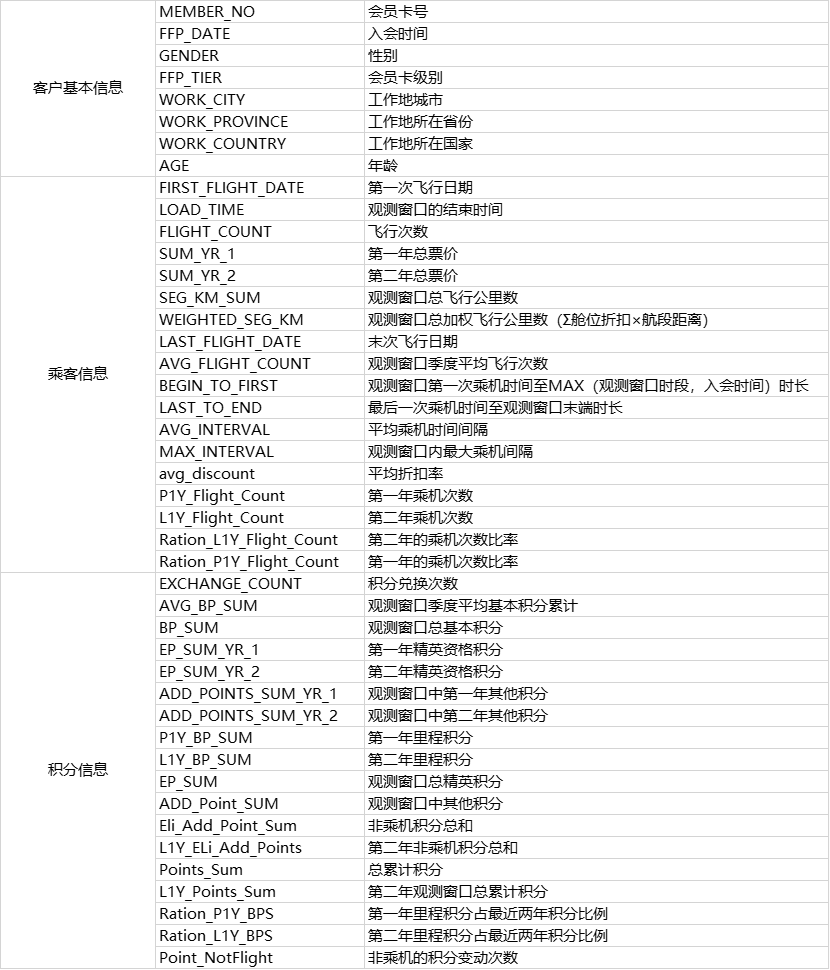

In [2]:
from IPython.display import Image, display

display(Image(filename='info.png'))

In [3]:
air_data_path = "./datasets/air_data.csv"
air_data = pd.read_csv(air_data_path)
air_data.shape

(62988, 44)

In [4]:
air_data.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [5]:
air_data.dtypes

MEMBER_NO                    int64
FFP_DATE                    object
FIRST_FLIGHT_DATE           object
GENDER                      object
FFP_TIER                     int64
WORK_CITY                   object
WORK_PROVINCE               object
WORK_COUNTRY                object
AGE                        float64
LOAD_TIME                   object
FLIGHT_COUNT                 int64
BP_SUM                       int64
EP_SUM_YR_1                  int64
EP_SUM_YR_2                  int64
SUM_YR_1                   float64
SUM_YR_2                   float64
SEG_KM_SUM                   int64
WEIGHTED_SEG_KM            float64
LAST_FLIGHT_DATE            object
AVG_FLIGHT_COUNT           float64
AVG_BP_SUM                 float64
BEGIN_TO_FIRST               int64
LAST_TO_END                  int64
AVG_INTERVAL               float64
MAX_INTERVAL                 int64
ADD_POINTS_SUM_YR_1          int64
ADD_POINTS_SUM_YR_2          int64
EXCHANGE_COUNT               int64
avg_discount        

In [6]:
missing_value = air_data.isnull().sum()
print(missing_value)

MEMBER_NO                     0
FFP_DATE                      0
FIRST_FLIGHT_DATE             0
GENDER                        3
FFP_TIER                      0
WORK_CITY                  2269
WORK_PROVINCE              3248
WORK_COUNTRY                 26
AGE                         420
LOAD_TIME                     0
FLIGHT_COUNT                  0
BP_SUM                        0
EP_SUM_YR_1                   0
EP_SUM_YR_2                   0
SUM_YR_1                    551
SUM_YR_2                    138
SEG_KM_SUM                    0
WEIGHTED_SEG_KM               0
LAST_FLIGHT_DATE              0
AVG_FLIGHT_COUNT              0
AVG_BP_SUM                    0
BEGIN_TO_FIRST                0
LAST_TO_END                   0
AVG_INTERVAL                  0
MAX_INTERVAL                  0
ADD_POINTS_SUM_YR_1           0
ADD_POINTS_SUM_YR_2           0
EXCHANGE_COUNT                0
avg_discount                  0
P1Y_Flight_Count              0
L1Y_Flight_Count              0
P1Y_BP_S

In [7]:
air_data.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,EP_SUM_YR_1,EP_SUM_YR_2,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62988.0,62988.000000,62437.000000,62850.000000,62988.000000,...,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,0.0,265.689623,5355.376064,5604.026014,17123.878691,...,1355.006223,1620.695847,1080.378882,12545.7771,6638.739585,0.486419,0.513581,0.522293,0.468422,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,0.0,1645.702854,8109.450147,8703.364247,20960.844623,...,7868.477000,8294.398955,5639.857254,20507.8167,12601.819863,0.319105,0.319105,0.339632,0.338956,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,368.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,0.0,0.000000,1003.000000,780.000000,4747.000000,...,0.000000,0.000000,0.000000,2775.0000,700.000000,0.250000,0.288889,0.258150,0.167954,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,0.0,0.000000,2800.000000,2773.000000,9994.000000,...,0.000000,0.000000,0.000000,6328.5000,2860.500000,0.500000,0.500000,0.514252,0.476747,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,0.0,0.000000,6574.000000,6845.750000,21271.250000,...,0.000000,345.000000,0.000000,14302.5000,7500.000000,0.711111,0.750000,0.815091,0.728375,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,0.0,74460.000000,239560.000000,234188.000000,580717.000000,...,984938.000000,984938.000000,728282.000000,985572.0000,728282.000000,1.000000,1.000000,0.999989,0.999993,140.000000


In [8]:
air_data = air_data.drop(air_data[(air_data['SUM_YR_1']==0.0)|(air_data['SUM_YR_2']==0.0)].index)
missing_value = air_data.isnull().sum()
print(missing_value)

MEMBER_NO                     0
FFP_DATE                      0
FIRST_FLIGHT_DATE             0
GENDER                        2
FFP_TIER                      0
WORK_CITY                  1455
WORK_PROVINCE              2015
WORK_COUNTRY                 16
AGE                         223
LOAD_TIME                     0
FLIGHT_COUNT                  0
BP_SUM                        0
EP_SUM_YR_1                   0
EP_SUM_YR_2                   0
SUM_YR_1                      0
SUM_YR_2                      0
SEG_KM_SUM                    0
WEIGHTED_SEG_KM               0
LAST_FLIGHT_DATE              0
AVG_FLIGHT_COUNT              0
AVG_BP_SUM                    0
BEGIN_TO_FIRST                0
LAST_TO_END                   0
AVG_INTERVAL                  0
MAX_INTERVAL                  0
ADD_POINTS_SUM_YR_1           0
ADD_POINTS_SUM_YR_2           0
EXCHANGE_COUNT                0
avg_discount                  0
P1Y_Flight_Count              0
L1Y_Flight_Count              0
P1Y_BP_S

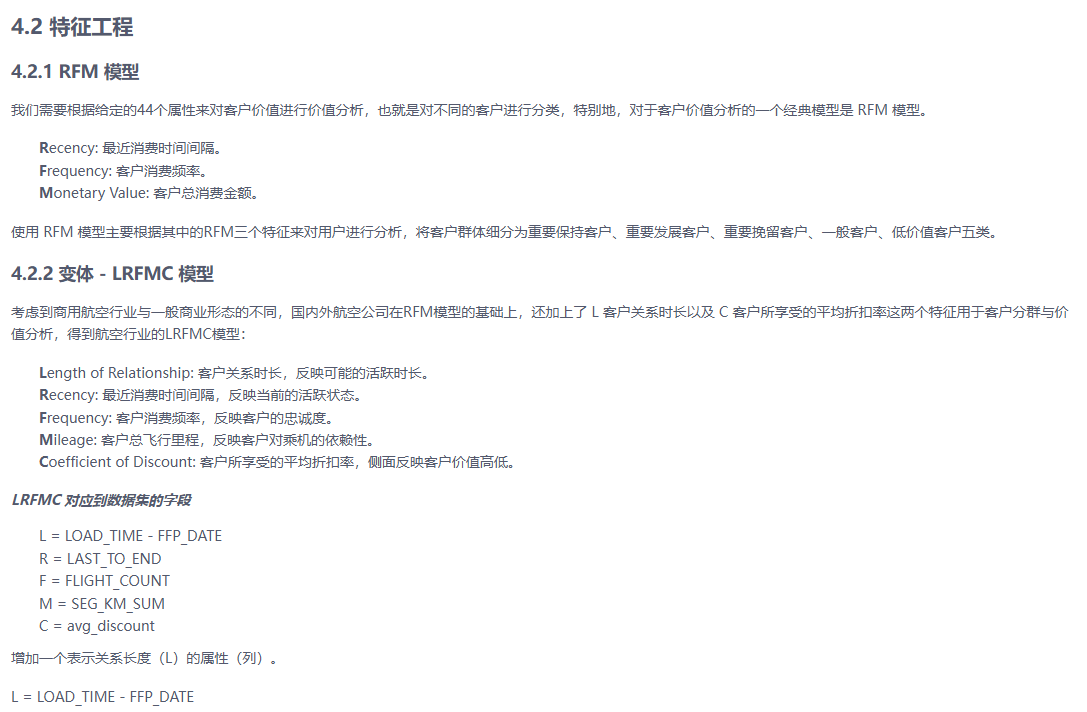

In [9]:
display(Image(filename='model.png'))

In [10]:
load_time = datetime.datetime.strptime('2014/03/31', '%Y/%m/%d')
ffp_dates = [datetime.datetime.strptime(ffp_date, '%Y/%m/%d') for ffp_date in air_data['FFP_DATE']]
length_of_relationship = [(load_time - ffp_date).days for ffp_date in ffp_dates]
air_data['LEN_REL'] = length_of_relationship
air_data['LEN_REL']

0        2706
1        2597
2        2615
3        2047
4        1816
         ... 
62876    1137
62887     936
62919     662
62932     441
62958     402
Name: LEN_REL, Length: 41516, dtype: int64

In [11]:
features = ['LEN_REL','FLIGHT_COUNT','avg_discount','SEG_KM_SUM','LAST_TO_END']
data = air_data[features]
features = ['L','F','C','M','R']
data.columns = features
data.head(5).T

,0,1,2,3,4
L,2706.000000,2597.000000,2615.000000,2047.00000,1816.000000
F,210.000000,140.000000,135.000000,23.00000,152.000000
C,0.961639,1.252314,1.254676,1.09087,0.970658
M,580717.000000,293678.000000,283712.000000,281336.00000,309928.000000
R,1.000000,7.000000,11.000000,97.00000,5.000000


In [12]:
ss = sklearn.preprocessing.StandardScaler(with_mean=True,with_std=True)
data = ss.fit_transform(data)
data = pd.DataFrame(data,columns=features)
data_ex = data.copy()

data_ex

,L,F,C,M,R
0,1.358337,12.364561,1.320351,23.665217,-1.025010
1,1.231314,7.909647,2.977929,11.496058,-0.963704
2,1.252291,7.591438,2.991393,11.073544,-0.922833
3,0.590378,0.463576,2.057289,10.972812,-0.044110
4,0.321184,8.673346,1.371781,12.184984,-0.984139
...,...,...,...,...,...
41511,-0.470082,-0.872899,-2.481162,-0.891227,0.947008
41512,-0.704315,-0.872899,-1.523535,-0.915223,1.335281
41513,-1.023618,-0.872899,-2.310087,-0.905472,2.254874
41514,-1.281158,-0.872899,1.225467,-0.938964,0.160244


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
L,41516.0,3.559902e-17,1.000012,-1.369724,-0.891935,-0.216038,0.819949,2.210200
F,41516.0,-3.286063e-17,1.000012,-0.872899,-0.618332,-0.300124,0.272651,12.555486
C,41516.0,7.694865e-16,1.000012,-3.387766,-0.585487,-0.083076,0.428075,4.390358
M,41516.0,8.215158e-17,1.000012,-0.938964,-0.615953,-0.311511,0.246827,23.665217
R,41516.0,7.119804e-17,1.000012,-1.025010,-0.830873,-0.330206,0.589388,2.704453


In [14]:
cluster_count = 5
km = sklearn.cluster.KMeans(n_clusters=cluster_count,n_init=4)
km.fit(data)

KMeans(n_clusters=5, n_init=4)

In [15]:
r1 = pd.Series(km.labels_).value_counts()
r2 = pd.DataFrame(km.cluster_centers_)
r = pd.concat([r2, r1], axis=1)
r.columns = list(data.columns) + ['counts']
r

,L,F,C,M,R,counts
0,-0.707740,-0.175636,-0.201621,-0.176204,-0.459365,15869
1,0.476174,2.331136,0.248332,2.253172,-0.811891,3902
2,0.212642,-0.016919,2.970820,-0.002347,-0.107045,1796
3,1.133083,-0.084232,-0.132312,-0.091751,-0.317766,10735
4,-0.344468,-0.583379,-0.184209,-0.543468,1.526140,9214


In [16]:
km.labels_

array([1, 1, 1, ..., 4, 0, 0])

In [17]:
data_rfm = data[['R','F','M']]
data_rfm.head(5)

,R,F,M
0,-1.025010,12.364561,23.665217
1,-0.963704,7.909647,11.496058
2,-0.922833,7.591438,11.073544
3,-0.044110,0.463576,10.972812
4,-0.984139,8.673346,12.184984


In [18]:
km.fit(data_rfm)

KMeans(n_clusters=5, n_init=4)

In [19]:
km.labels_

array([2, 2, 2, ..., 4, 1, 0])

In [20]:
r1 = pd.Series(km.labels_).value_counts()
r2 = pd.DataFrame(km.cluster_centers_)
rr = pd.concat([r2, r1], axis=1)
# rr = pd.DataFrame(ss.fit_transform(rr) )
rr.columns = list(data_rfm.columns) + ['counts']
rr

,R,F,M,counts
0,-0.658322,-0.269660,-0.284301,15803
1,0.466232,-0.463220,-0.435004,10364
2,-0.870299,3.399565,3.363497,1561
3,-0.674069,1.009714,0.970051,7451
4,1.886972,-0.598906,-0.552925,6337


In [21]:
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

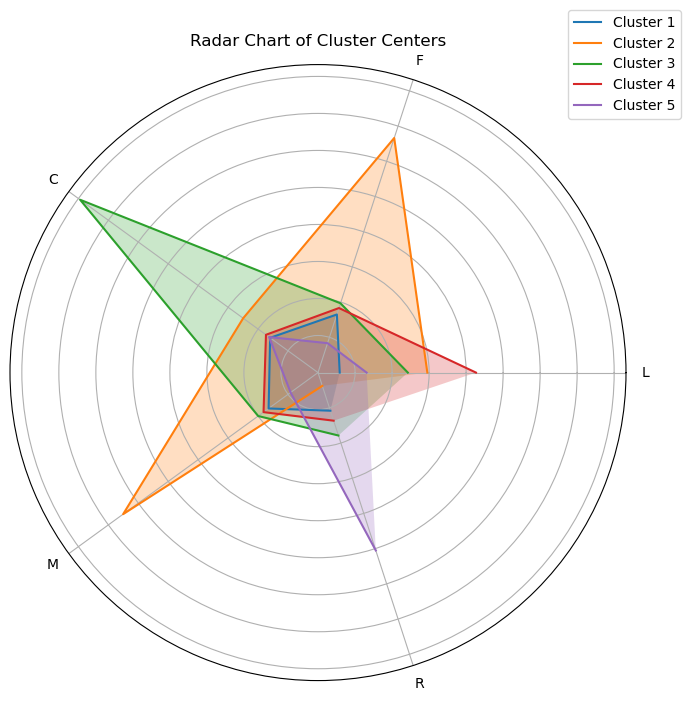

In [22]:
# 获取特征名称（去掉最后一列 'counts'）
features = r.columns[:-1]

# 设置雷达图的角度
num_vars = len(features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 为了闭合雷达图，需要将第一项添加到末尾
values = r.iloc[:, :-1].values.T

# 创建雷达图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 绘制每个聚类的雷达图
for i in range(len(r)):
    ax.fill(angles, values[:, i], alpha=0.25)
    ax.plot(angles, values[:, i], label=f'Cluster {i+1}')

# 添加标签和标题
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(features)
ax.set_title('Radar Chart of Cluster Centers')
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

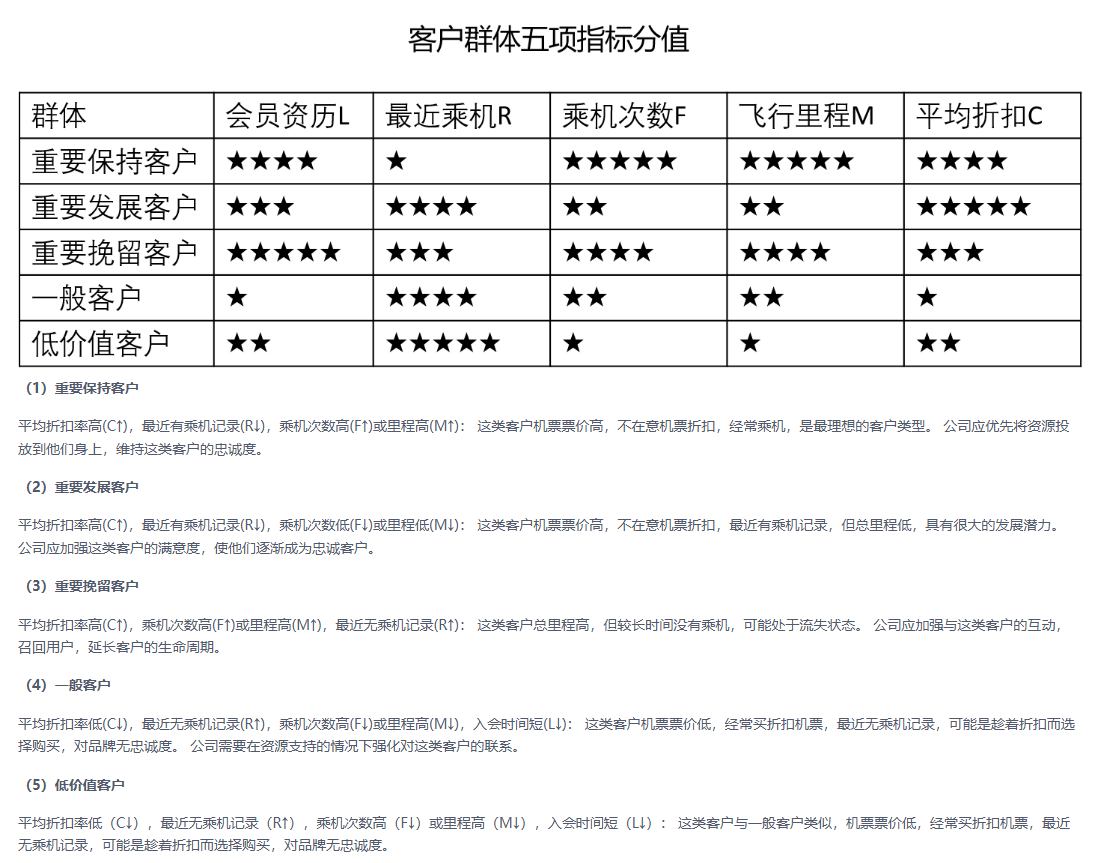

In [23]:
display(Image(filename='result.png'))